In [1]:
%matplotlib inline

from pylab import *
import matplotlib.pyplot as plt


Initialisation
==============

* importing pyAgrum
* importing pyAgrum.lib tools
* loading a BN

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from pyAgrum.lib.pretty_print import pretty_cpt

## Create a first BN : bn

In [3]:
bn=gum.loadBN("../resources/asia.bif")
# randomly re-generate parameters for every Conditional Probability Table
bn.generateCPTs() 
gnb.showBN(bn,size="3")

In [4]:
pretty_cpt(bn.cpt(3))

                       |---------------|
-----------------------|positive_XraY? |
 tuberculos_or_cancer? |   0      1    |
-----------------------|---------------|
           0           | 0.1305 0.8695 |
           1           | 0.5246 0.4754 |
-----------------------|---------------|


## Create a second BN : bn2

In [5]:
bn2=gum.loadBN("../resources/asia.bif")
bn2.generateCPTs()
gnb.showBN(bn,size="3")

In [6]:
pretty_cpt(bn2.cpt(3))

                       |---------------|
-----------------------|positive_XraY? |
 tuberculos_or_cancer? |   0      1    |
-----------------------|---------------|
           0           | 0.4695 0.5305 |
           1           | 0.1656 0.8344 |
-----------------------|---------------|


## Exact and (Gibbs) approximated KL-divergence 

In order to compute KL-divergence, we just need to be sure that the 2 distributions are defined on the same domain (same variables, etc.)

<h3>Exact KL</h3>


In [7]:
g1=gum.BruteForceKL(bn,bn2)
print(g1.compute())

{'bhattacharya': 0.34432492792161845, 'klPQ': 2.249054155383506, 'errorQP': 0, 'hellinger': 0.7632842004574771, 'klQP': 1.8493953695290912, 'errorPQ': 0}


If the models are not on the same domain :

In [8]:
bn_different_domain=gum.loadBN("../resources/alarm.dsl")

# g=gum.BruteForceKL(bn,bn_different_domain) # a KL-divergence between asia and alarm ... :(
#
# would cause
#---------------------------------------------------------------------------
#OperationNotAllowed                       Traceback (most recent call last)
#
#OperationNotAllowed: this operation is not allowed : KL : the 2 BNs are not compatible (not the same vars : visit_to_Asia?)

<h3>Gibbs-approximated KL</h3>

There is something wrong with <em>Bhattacharya</em> computations...


In [9]:
g=gum.GibbsKL(bn,bn2)
g.setVerbosity(True)
g.setMaxTime(120)
g.setBurnIn(5000)
g.setEpsilon(1e-7)
g.setPeriodSize(500)

In [10]:
print(g.compute())
print("Computed in {0} s".format(g.currentTime()))

{'bhattacharya': -11.90319164364093, 'klPQ': 2.242300308698933, 'errorQP': 0, 'hellinger': 0.7605905610164156, 'klQP': 1.8221605819767046, 'errorPQ': 0}
Computed in 7.928238 s


--
stopped with epsilon=1e-07
--
Temps de calcul : 7.928238
Nombre d'itérations : 208500


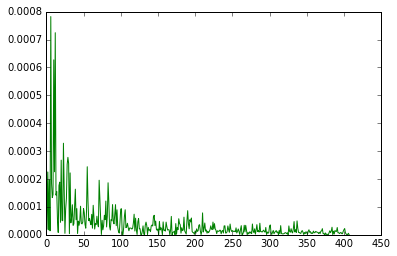

In [11]:
print("--")

print(g.messageApproximationScheme())
print("--")

print("Temps de calcul : {0}".format(g.currentTime()))
print("Nombre d'itérations : {0}".format(g.nbrIterations()))

plot(g.history(), 'g')

### Animation of Gibbs KL

Since it may be difficult to know what happens during approximation algorithm, pyAgrum allow to follow the iteration using animated matplotlib figure

In [12]:
g=gum.GibbsKL(bn,bn2)
g.setMaxTime(60)
g.setBurnIn(500)
g.setEpsilon(1e-7)
g.setPeriodSize(5000)

{'bhattacharya': -12.181241216523798,
 'errorPQ': 0,
 'errorQP': 0,
 'hellinger': 0.7603596340628649,
 'klPQ': 2.2463447761507958,
 'klQP': 1.818988598938989}

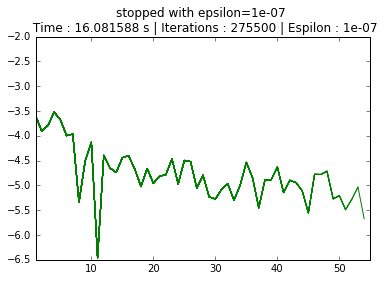

In [13]:
gnb.animApproximationScheme(g) # logarithmique scale for Y
g.compute()